In [2]:
import streamlit as st
from segment_anything import sam_model_registry, SamPredictor,SamAutomaticMaskGenerator
import cv2
import supervision as sv
import matplotlib.pyplot as plt
import numpy as np
import torch

In [53]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [55]:
image = cv2.imread("./chienchat2.jpeg",cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

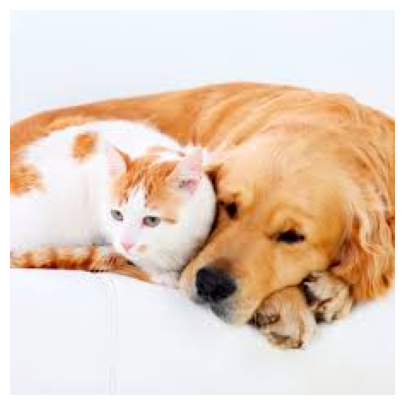

In [56]:
plt.figure(figsize=(5,5))
plt.imshow(image)
plt.axis('off')
plt.show() 

In [61]:
# sam_checkpoint = "./sam_vit_b_01ec64.pth"
sam_checkpoint = "./sam_vit_h_4b8939.pth"
model_type = "vit_h"
torch.cuda.empty_cache()
device = "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)


In [62]:
masks = mask_generator.generate(image)

In [63]:
masks[0]["segmentation"]

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

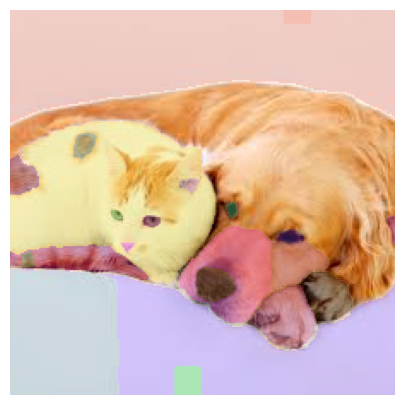

In [64]:
plt.figure(figsize=(5,5))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 

In [3]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

In [4]:
sam_checkpoint = "./sam_vit_b_01ec64.pth"
model_type = "vit_b"
torch.cuda.empty_cache()
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
predictor = SamPredictor(sam)

In [5]:
image_ = cv2.imread("./img/chienchat2.jpeg",cv2.IMREAD_COLOR)
image_ = cv2.cvtColor(image_, cv2.COLOR_BGR2RGB)

predictor.set_image(image_)




input_point = np.array([(22, 96),(84, 101),(40,123)])
input_label = np.array([1,1,1])



masks, scores, logits  = predictor.predict(
point_coords=input_point,
point_labels=input_label,
multimask_output=True)


In [6]:
masks

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

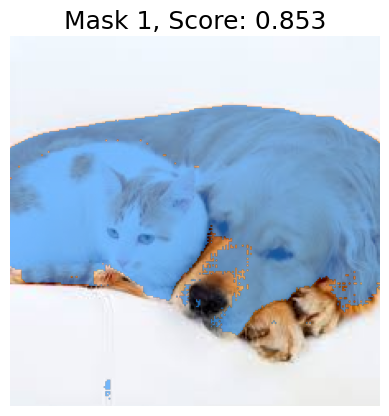

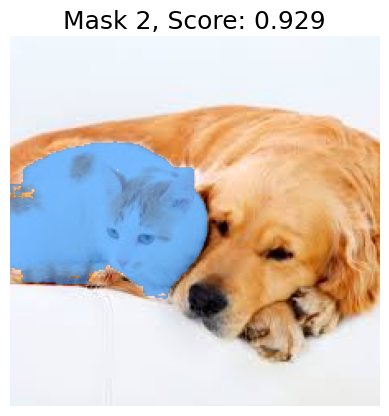

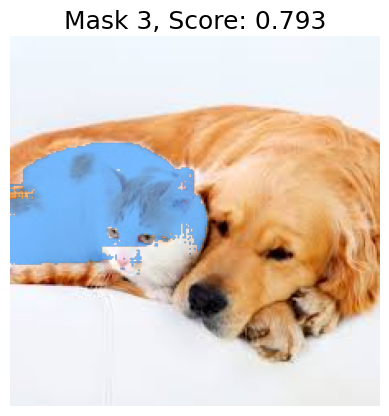

In [7]:
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure()
    plt.imshow(image_)
    show_mask(mask, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()  

In [8]:
def remove_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    
    # Remove color from rest of the image
    rest_image = np.ones_like(mask_image) * (1 - mask.reshape(h, w, 1))  # Inverse mask
    masked_image = mask_image + rest_image
    
    ax.imshow(masked_image)

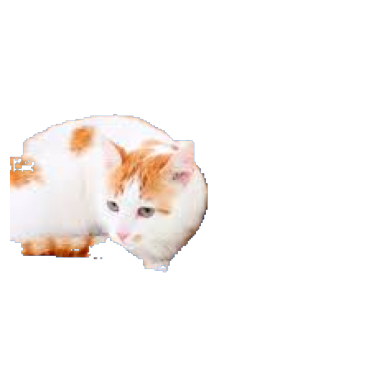

In [10]:

plt.figure()
plt.imshow(image_)
remove_mask(masks[1], plt.gca())

plt.axis('off')
plt.show()  